### Importing Required Libraries

In [1]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

### Building the Convolution Neural Networks Model

In [2]:

model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

## Training the Model

In [3]:
TRAINING_DIR = "./train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))


Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model2-{epoch:03d}.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[checkpoint])
model.load_weights('mask_detection_model.h5')


Epoch 1/10
132/132 [==============================] - 10s 75ms/step - loss: 0.1426 - acc: 0.9506 - val_loss: 0.0726 - val_acc: 0.9691
Epoch 2/10
132/132 [==============================] - 10s 78ms/step - loss: 0.1276 - acc: 0.9490 - val_loss: 0.1986 - val_acc: 0.9021
Epoch 3/10
132/132 [==============================] - 10s 78ms/step - loss: 0.1303 - acc: 0.9521 - val_loss: 0.0317 - val_acc: 0.9845
Epoch 4/10
132/132 [==============================] - 11s 84ms/step - loss: 0.1362 - acc: 0.9513 - val_loss: 0.0682 - val_acc: 0.9742
Epoch 5/10
132/132 [==============================] - 9s 71ms/step - loss: 0.1380 - acc: 0.9521 - val_loss: 0.0237 - val_acc: 0.9948
Epoch 6/10
132/132 [==============================] - 9s 72ms/step - loss: 0.1229 - acc: 0.9574 - val_loss: 0.0842 - val_acc: 0.9742
Epoch 7/10
132/132 [==============================] - 11s 80ms/step - loss: 0.1343 - acc: 0.9490 - val_loss: 0.0490 - val_acc: 0.9794
Epoch 8/10
132/132 [==============================] - 11s 81ms/s

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


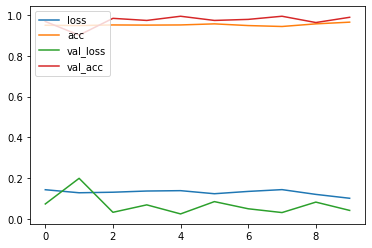

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

plt.plot(pd.DataFrame(history.history))
# plt.legend(['loss', 'acc', 'val_loss', 'val_acc'], loc='upper left')
plt.legend(history.history.keys(), loc='upper left')
print(history.history.keys())

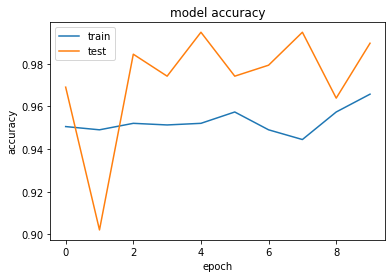

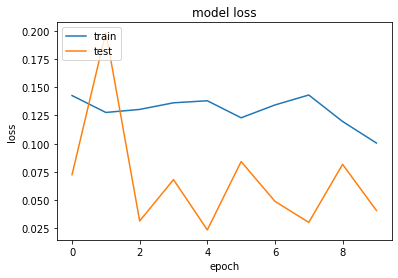

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
plt.style.context('Solarize_Light2')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print('Test accuracy:', accuracy)

20/20 [==============================] - 1s 20ms/step - loss: 0.0304 - acc: 0.9845
Test accuracy: 0.9845361113548279


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [17]:
# Load the input image
img_path = './mask.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 150.0

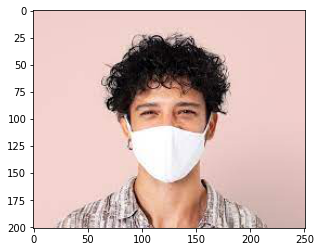

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()


In [20]:
prediction = model.predict(img_array)

# Print the predicted class
predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print('Masked')
else:
    print('Unmasked')

Masked
